In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import mobilenet_v2
from tensorflow.keras.layers import GlobalAveragePooling2D ,Conv2D

In [2]:
train_ds=tf.keras.utils.image_dataset_from_directory(
    
    "D:/Data/Brain/Training",
    seed=42,
    batch_size=32,
    image_size=(224,224),
    
    

)
val_ds=tf.keras.utils.image_dataset_from_directory(
    
    "D:/Data/Brain/Testing/",
    seed=42,
    batch_size=32,
    image_size=(224,224),
    
    

)

Found 5712 files belonging to 4 classes.
Found 1311 files belonging to 4 classes.


In [3]:
class_names=train_ds.class_names

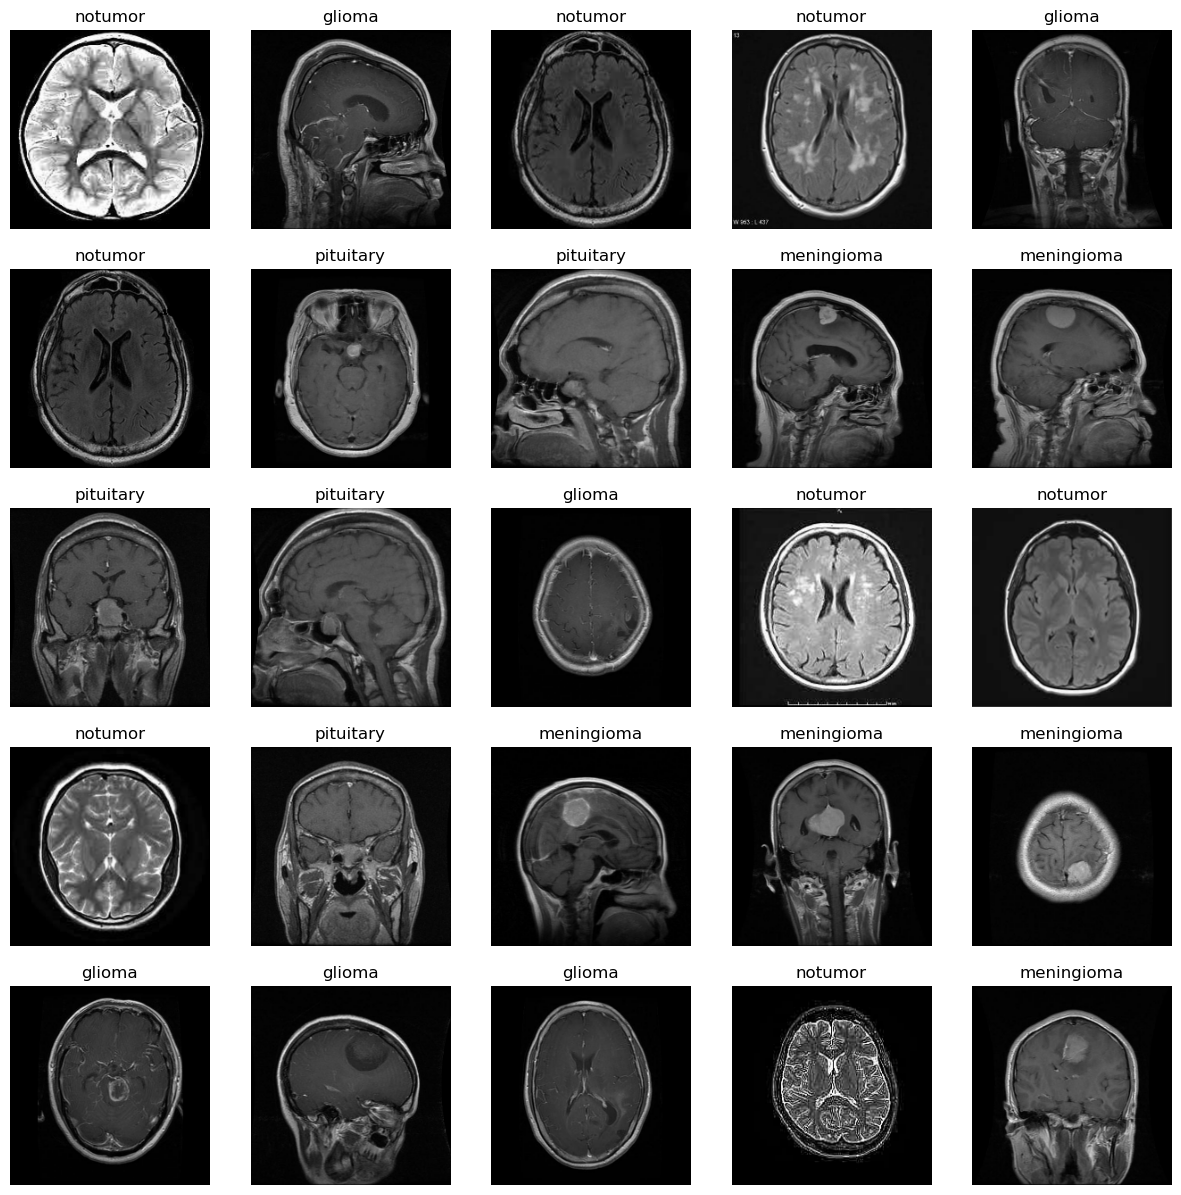

In [4]:
plt.figure(figsize=(15,15))
for image,label in train_ds.take(1):
    for i in range(25):
        ax=plt.subplot(5,5,i+1)
        plt.imshow(image[i].numpy().astype("uint8"))
        plt.title(class_names[label[i]])
        plt.axis("off")


In [5]:
from tensorflow.keras.layers import Rescaling

normalization_layer = Rescaling(1./255)

train_ds_norm = train_ds.map(lambda x, y: (normalization_layer(x), y))
val_ds_norm = val_ds.map(lambda x, y: (normalization_layer(x), y))

## CNN

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D, Dense, Flatten, Dropout
from tensorflow.keras.layers import Input

cnn_model = Sequential([
    Input(shape=(224, 224, 3)),

    # First Convolutional Block
    Conv2D(32, (3,3), activation='relu'),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    # Second Convolutional Block
    Conv2D(128, (3,3), activation='relu'),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.3),  # ✅ تقليل الارتباط بين الميزات

    # Third Convolutional Block
    Conv2D(256, (3,3), activation='relu'),
    Conv2D(256, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.4),  # ✅ تقليل الـ overfitting أكثر

    # Fourth Convolutional Block
    Conv2D(512, (3,3), activation='relu'),
    Conv2D(512, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    # Fully Connected Layers
    Flatten(),
    Dense(512, activation="relu"),
    Dropout(0.5),  # ✅ مهم جدًا قبل الطبقة النهائية
    Dense(4, activation="softmax")  
])

cnn_model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 220, 220, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 110, 110, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 108, 108, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 106, 106, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 53, 53, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 53, 53, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 51, 51, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 49, 49, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 24, 24, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 24, 24, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 22, 22, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 20, 20, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 10, 10, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 51200)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    26,214,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │         2,052 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,883,012 (117.81 MB)

 Trainable params: 30,883,012 (117.81 MB)

 Non-trainable params: 0 (0.00 B)

In [7]:
cnn_model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [8]:
cnn_model.fit(train_ds,validation_data=val_ds,epochs=15)

Epoch 1/15
179/179 ━━━━━━━━━━━━━━━━━━━━ 875s 5s/step - accuracy: 0.4058 - loss: 18.2099 - val_accuracy: 0.6079 - val_loss: 0.9944
Epoch 2/15
179/179 ━━━━━━━━━━━━━━━━━━━━ 868s 5s/step - accuracy: 0.7130 - loss: 0.7390 - val_accuracy: 0.6819 - val_loss: 0.7580
Epoch 3/15
179/179 ━━━━━━━━━━━━━━━━━━━━ 859s 5s/step - accuracy: 0.8217 - loss: 0.5110 - val_accuracy: 0.7811 - val_loss: 0.5359
Epoch 4/15
179/179 ━━━━━━━━━━━━━━━━━━━━ 857s 5s/step - accuracy: 0.8476 - loss: 0.4059 - val_accuracy: 0.7704 - val_loss: 0.5458
Epoch 5/15
179/179 ━━━━━━━━━━━━━━━━━━━━ 849s 5s/step - accuracy: 0.8557 - loss: 0.3830 - val_accuracy: 0.8261 - val_loss: 0.4133
Epoch 6/15
179/179 ━━━━━━━━━━━━━━━━━━━━ 844s 5s/step - accuracy: 0.8787 - loss: 0.3367 - val_accuracy: 0.8230 - val_loss: 0.4508
Epoch 7/15
179/179 ━━━━━━━━━━━━━━━━━━━━ 845s 5s/step - accuracy: 0.8919 - loss: 0.2980 - val_accuracy: 0.8322 - val_loss: 0.4211
Epoch 8/15
179/179 ━━━━━━━━━━━━━━━━━━━━ 837s 5s/step - accuracy: 0.8912 - loss: 0.2709 - val_acc

In [9]:
loss,accuracy=cnn_model.evaluate(val_ds)

41/41 ━━━━━━━━━━━━━━━━━━━━ 39s 945ms/step - accuracy: 0.9008 - loss: 0.2765


In [10]:
print(f"Accuracy of Cnn is : {accuracy:.2f} %")
print(f"Loss of Cnn is : {loss}")

Accuracy of Cnn is : 0.91 %
Loss of Cnn is : 0.25388073921203613


In [11]:
cnn_model.save("D:/Cnn_model_brain_tomer91.keras")

In [12]:
class_names = train_ds.class_names  # ده بيجيب ترتيب الفئات بنفس الترتيب اللي استخدمه الموديل أثناء التدريب

print("ترتيب الفئات:", class_names)

ترتيب الفئات: ['glioma', 'meningioma', 'notumor', 'pituitary']


41/41 ━━━━━━━━━━━━━━━━━━━━ 57s 1s/step


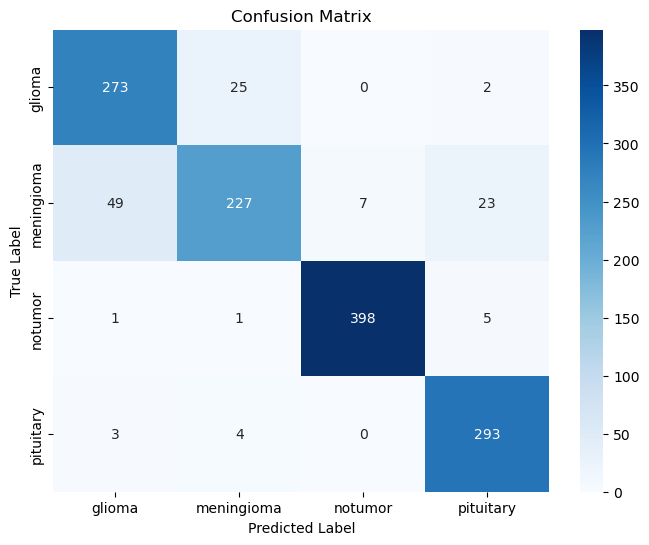

              precision    recall  f1-score   support

      glioma       0.84      0.91      0.87       300
  meningioma       0.88      0.74      0.81       306
     notumor       0.98      0.98      0.98       405
   pituitary       0.91      0.98      0.94       300

    accuracy                           0.91      1311
   macro avg       0.90      0.90      0.90      1311
weighted avg       0.91      0.91      0.91      1311



In [15]:

from sklearn.metrics import confusion_matrix, classification_report
# تحويل بيانات val_ds إلى مصفوفة لاستخدامها دفعة واحدة
x_val = []
y_true = []

for images, labels in val_ds:
    x_val.extend(images.numpy())  # تحويل الصور إلى numpy list
    y_true.extend(labels.numpy())  # استخراج التصنيفات الحقيقية

x_val = np.array(x_val)
y_true = np.array(y_true)

# التنبؤ بجميع الصور دفعة واحدة
y_pred = np.argmax(cnn_model.predict(x_val), axis=1)

# إنشاء Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

# عرض Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# طباعة تقرير الأداء
print(classification_report(y_true, y_pred, target_names=class_names))


In [17]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import io

# تحميل الموديل
model = tf.keras.models.load_model("D:/Cnn_model_brain_tomer91.keras")
class_names =['glioma', 'meningioma', 'notumor', 'pituitary']

# تحميل الصورة
image_path = "D:Data/Brain/Testing/notumor/Te-no_0016.jpg"
img = image.load_img(image_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0  # تجهيز الصورة

# التنبؤ
prediction = model.predict(img_array)
predicted_class = class_names[np.argmax(prediction)]

print(f"Prediction: {predicted_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 369ms/step
Prediction: notumor


In [5]:
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input

train_ds = train_ds.map(lambda x, y: (preprocess_input(x), y))
val_ds = val_ds.map(lambda x, y: (preprocess_input(x), y))


In [6]:
from tensorflow import keras
from tensorflow.keras import layers

base_model = keras.applications.MobileNetV2(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

# تجميد الطبقات الأساسية
base_model.trainable = False

model = keras.Sequential([
    
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(4, activation="softmax")  # عدد الكلاسات = 4
])

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])


In [7]:
model.fit(train_ds,validation_data=val_ds,epochs=20)

Epoch 1/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 68s 359ms/step - accuracy: 0.7264 - loss: 0.7074 - val_accuracy: 0.8520 - val_loss: 0.4402
Epoch 2/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 59s 328ms/step - accuracy: 0.8925 - loss: 0.3132 - val_accuracy: 0.8734 - val_loss: 0.3654
Epoch 3/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 59s 329ms/step - accuracy: 0.9115 - loss: 0.2496 - val_accuracy: 0.8886 - val_loss: 0.3129
Epoch 4/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 60s 337ms/step - accuracy: 0.9276 - loss: 0.2119 - val_accuracy: 0.9031 - val_loss: 0.2721
Epoch 5/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 61s 338ms/step - accuracy: 0.9403 - loss: 0.1872 - val_accuracy: 0.9092 - val_loss: 0.2784
Epoch 6/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 60s 335ms/step - accuracy: 0.9404 - loss: 0.1684 - val_accuracy: 0.9138 - val_loss: 0.2525
Epoch 7/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 60s 336ms/step - accuracy: 0.9546 - loss: 0.1523 - val_accuracy: 0.9176 - val_loss: 0.2387
Epoch 8/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 61s 338ms/step - accuracy: 0.9518 - loss: 0

In [9]:

base_model.trainable = True
for layer in base_model.layers[:-30]:
    base_model.trainable=False

model.fit(train_ds,validation_data=val_ds,epochs=10)

Epoch 1/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 61s 340ms/step - accuracy: 0.9847 - loss: 0.0626 - val_accuracy: 0.9413 - val_loss: 0.1725
Epoch 2/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 61s 338ms/step - accuracy: 0.9850 - loss: 0.0657 - val_accuracy: 0.9382 - val_loss: 0.1945
Epoch 3/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 61s 338ms/step - accuracy: 0.9867 - loss: 0.0597 - val_accuracy: 0.9382 - val_loss: 0.1804
Epoch 4/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 61s 338ms/step - accuracy: 0.9878 - loss: 0.0556 - val_accuracy: 0.9382 - val_loss: 0.1882
Epoch 5/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 61s 339ms/step - accuracy: 0.9887 - loss: 0.0532 - val_accuracy: 0.9382 - val_loss: 0.1820
Epoch 6/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 61s 338ms/step - accuracy: 0.9880 - loss: 0.0549 - val_accuracy: 0.9390 - val_loss: 0.1811
Epoch 7/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 61s 341ms/step - accuracy: 0.9882 - loss: 0.0497 - val_accuracy: 0.9413 - val_loss: 0.1878
Epoch 8/10
179/179 ━━━━━━━━━━━━━━━━━━━━ 61s 340ms/step - accuracy: 0.9873 - loss: 0

In [10]:
loss,accuracy=model.evaluate(val_ds)
print(f"Accuracy : {accuracy} % ")
print(f"Loss : {loss}")

41/41 ━━━━━━━━━━━━━━━━━━━━ 11s 272ms/step - accuracy: 0.9420 - loss: 0.1944
Accuracy : 0.9435545206069946 % 
Loss : 0.1732594072818756


In [11]:
model.save("D:/Brain_mobilenetv2_94.keras")

Class Names: ['glioma', 'meningioma', 'notumor', 'pituitary']
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 268ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 271ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 337ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 275ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 284ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 287ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 279ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 292ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 286ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 289ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 282ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 277ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 306ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 293ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 270ms/step
1/1 ━

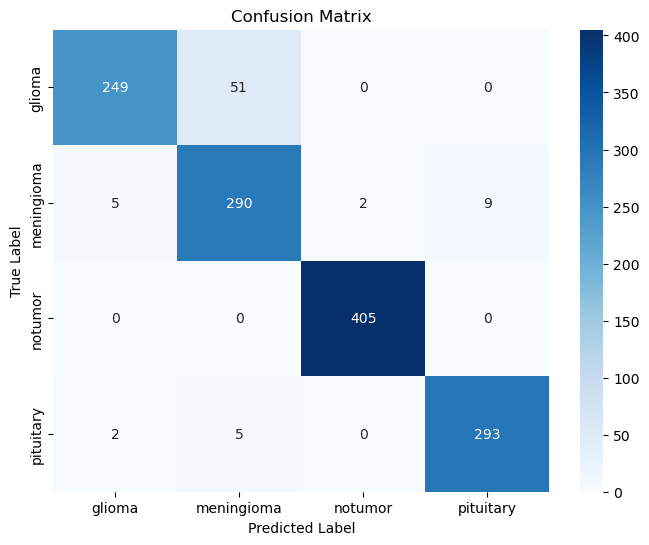

              precision    recall  f1-score   support

      glioma       0.97      0.83      0.90       300
  meningioma       0.84      0.95      0.89       306
     notumor       1.00      1.00      1.00       405
   pituitary       0.97      0.98      0.97       300

    accuracy                           0.94      1311
   macro avg       0.94      0.94      0.94      1311
weighted avg       0.95      0.94      0.94      1311



In [12]:
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report

# تحميل الموديل
model = tf.keras.models.load_model("D:/Brain_mobilenetv2_94.keras")  # المسار الخاص بالموديل

# استخراج أسماء الفئات من المجلدات
data_dir = "D:/Data/Brain/Training"  # مجلد التدريب اللي فيه الفئات
class_names = sorted(os.listdir(data_dir))  # ترتيب الفئات أبجديًا
print("Class Names:", class_names)

# تهيئة القوائم لحفظ القيم الحقيقية والمتوقعة
y_true = []
y_pred = []

# تمرير بيانات الاختبار عبر الموديل للحصول على التوقعات
for images, labels in val_ds:
    preds = model.predict(images)  # توقعات النموذج
    y_pred.extend(np.argmax(preds, axis=1))  # استخراج التصنيف المتوقّع
    y_true.extend(labels.numpy())  # استخراج التصنيف الحقيقي

# تحويل القوائم إلى numpy arrays
y_true = np.array(y_true)
y_pred = np.array(y_pred)

# إنشاء Confusion Matrix
cm = confusion_matrix(y_true, y_pred)

# عرض Confusion Matrix بشكل مرئي
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

# طباعة تقرير الأداء
print(classification_report(y_true, y_pred, target_names=class_names))


In [15]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import io

# تحميل الموديل
model = tf.keras.models.load_model("D:/Brain_mobilenetv2_94.keras")
class_names =['glioma', 'meningioma', 'notumor', 'pituitary']

# تحميل الصورة
image_path = "D:Data/Brain/Testing/meningioma/Te-me_0089.jpg"
img = image.load_img(image_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0  # تجهيز الصورة

# التنبؤ
prediction = model.predict(img_array)
predicted_class = class_names[np.argmax(prediction)]

print(f"Prediction: {predicted_class}")


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 896ms/step
Prediction: meningioma


In [16]:
train_Data=tf.keras.utils.image_dataset_from_directory(
    
    "D:/Data/Brain/Training",
    seed=42,
    batch_size=32,
    image_size=(224,224),
    
    

)
val_Data=tf.keras.utils.image_dataset_from_directory(
    
    "D:/Data/Brain/Testing/",
    seed=42,
    batch_size=32,
    image_size=(224,224),
    
    

)

Found 5712 files belonging to 4 classes.
Found 1311 files belonging to 4 classes.


In [17]:
from tensorflow.keras.applications.efficientnet import preprocess_input

train_Data = train_Data.map(lambda x, y: (preprocess_input(x), y))
val_Data = val_Data.map(lambda x, y: (preprocess_input(x), y))


## EfficintNet

In [18]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import EfficientNetB3
from tensorflow.keras.layers import Dense, Flatten, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam



# تحميل EfficientNetB3 بدون الطبقات النهائية
base_model = EfficientNetB3(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

# تجميد الطبقات الأساسية
base_model.trainable = False

# إضافة الطبقات النهائية
x = GlobalAveragePooling2D()(base_model.output)
x = Dropout(0.3)(x)  # تقليل Overfitting
x = Dense(4, activation="softmax")(x)  # 4 فئات

# إنشاء النموذج
model = Model(inputs=base_model.input, outputs=x)

# تجميع النموذج
model.compile(optimizer=Adam(learning_rate=0.0001),
             loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

# تدريب النموذج
history = model.fit(
    train_Data,
    validation_data=val_Data,
    epochs=20,
  
)




Epoch 1/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 172s 897ms/step - accuracy: 0.3579 - loss: 1.3687 - val_accuracy: 0.6766 - val_loss: 0.9126
Epoch 2/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 160s 892ms/step - accuracy: 0.6863 - loss: 0.8776 - val_accuracy: 0.7483 - val_loss: 0.7289
Epoch 3/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 161s 898ms/step - accuracy: 0.7576 - loss: 0.7082 - val_accuracy: 0.7712 - val_loss: 0.6418
Epoch 4/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 160s 896ms/step - accuracy: 0.7922 - loss: 0.6039 - val_accuracy: 0.7857 - val_loss: 0.5878
Epoch 5/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 160s 895ms/step - accuracy: 0.8077 - loss: 0.5560 - val_accuracy: 0.7941 - val_loss: 0.5508
Epoch 6/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 160s 893ms/step - accuracy: 0.8255 - loss: 0.5027 - val_accuracy: 0.8009 - val_loss: 0.5214
Epoch 7/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 160s 892ms/step - accuracy: 0.8339 - loss: 0.4884 - val_accuracy: 0.8108 - val_loss: 0.4980
Epoch 8/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 160s 892ms/step - accuracy: 0.8422 -

In [19]:
# **إلغاء تجميد بعض الطبقات وإعادة التدريب**
base_model.trainable = True  # السماح بتحديث أوزان النموذج
for layer in base_model.layers[:30]:  # تجميد أول 100 طبقة فقط
    layer.trainable = False

# إعادة تجميع النموذج مع Learning Rate أقل
model.compile(optimizer=Adam(learning_rate=0.00001),
              loss="categorical_crossentropy",
              metrics=["accuracy"])

# تدريب إضافي بعد Fine-Tuning
history_finetune = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=5,
    verbose=1
)

# حفظ النموذج
model.save("brain_tumor_efficientnetB3.h5")

Epoch 1/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 769s 4s/step - accuracy: 0.6084 - loss: 0.9396 - val_accuracy: 0.2334 - val_loss: 2.4807
Epoch 2/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 729s 4s/step - accuracy: 0.8064 - loss: 0.5135 - val_accuracy: 0.4088 - val_loss: 1.4109
Epoch 3/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 729s 4s/step - accuracy: 0.8339 - loss: 0.4442 - val_accuracy: 0.7170 - val_loss: 0.6794
Epoch 4/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 730s 4s/step - accuracy: 0.8657 - loss: 0.3542 - val_accuracy: 0.8261 - val_loss: 0.4433
Epoch 5/5
179/179 ━━━━━━━━━━━━━━━━━━━━ 729s 4s/step - accuracy: 0.8908 - loss: 0.3024 - val_accuracy: 0.8795 - val_loss: 0.3151
